# Multi class classification and neural networks

*Source: Project assignment form **Andrew Ng** Machine Learning [course](https://www.coursera.org/learn/machine-learning) (Coursera).*

**Goal:** Mathematically implement regularized logistic regression in a computer vision task.

---

## Problem context

The first classification technique any aspiring data scientist comes across is usually **logistic regression**. In fact, a lot of banking services still use it, despite the rise of more powerful methods like random forests. It’s not all that surprising however, given how straightforward and interpretable logistic regression is. But could you imagine using it for a computer vision task?

In this project, we will see how a simple algorithm like **logistic regression** can be used to recognise handwritten digits $(0–9)$ using a technique called *one-vs-all classification*. Along the way, we will also see the benefits of vectorization.

## Understanding *one-vs-all classification*

If there are $K$ different classes in a data set, we will first build a model where we consider the data belonging to one class as positive, and all other classes as negative. Next, we will build another model assuming the data belonging to some other class as positive and the remaining as negative. We shall keep repeating the process until we build $K$ different models.

Let us understand this better with the help of an example. In the figurebelow, we have data belonging to $3$ different classes. Hence, we will build $3$ different models considering one particular class of data as positive and the remaining as negative.

In general, if there are $K$ classes in the data-set, we need to build $K$ different models.

![Borrowed from Andrew Ng Machine Learning course (Coursera)](../img/one-vs-all.png)

## One-vs-all using logistic regression

The data-set consists of digits from $0$ to $9$, so we have $10$ different classes here. We will make use of the one-vs-all classification technique by training $10$ different logistic regression classifiers as mentioned above.

First, let’s load the necessary libraries.

In [1]:
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

## Reading the data

In [2]:
data = loadmat('../data/ml-data05.mat')
X = data['X']
y = data['y']

The data set has $5000$ training examples where each example is a $20$-by-$20$ pixel grey scale image unrolled into a $400$-dimensional vector thus forming a $5000$ by $400$ matrix $X$. Also note that the digit $0$ is labeled as $10$ while the digits $1–9$ are labeled as $1–9$ in the labeling vector $y$.

## Visualizing the data

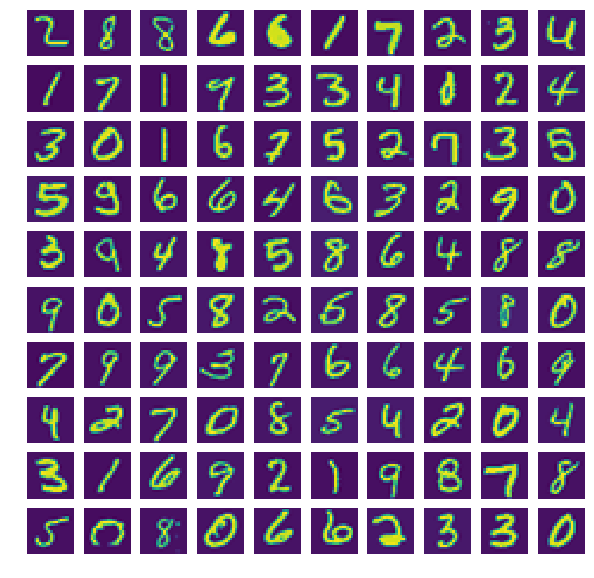

In [3]:
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))          
       axarr[i,j].axis('off') 

## Adding the intercept term

In [4]:
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X)) #add the intercept
(m,n) = X.shape

## Vectorization

According to **Andrew Ng**, *“Vectorization is the art of getting rid of explicit for-loops in code”*. We as data scientists work with huge amounts of data. Using for-loops while working on such huge data is highly inefficient. Hence, we make use of the vectorization technique which avoids the use of for-loops and also improves efficiency and speed of calculations.

For example, let’s consider two $1$-d arrays - $a$ and $b$ having a million elements each. To demonstrate the speed at which vectorization vs for-loops operate, we perform element wise multiplication of both the arrays and sum the elements in resulting array and compare the time difference.

In [5]:
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

c = 0
tic = time.time()
for i in range(1000000):
  c += a[i] * b[i]
toc = time.time()
print("Value of c: {0:.5f}".format(c))
print("Time taken using for-loop: " + str(1000*(toc-tic)) + " ms. \n")

c = 0
tic = time.time()
c = np.dot(a,b) # no for-loops in vectorized version
toc = time.time()
print("Value of c: {0:.5f}".format(c))
print("Time taken using vectorized operation: " + str(1000*(toc-tic)) + " ms.")

Value of c: 250052.83870
Time taken using for-loop: 630.6161880493164 ms. 

Value of c: 250052.83870
Time taken using vectorized operation: 2.270936965942383 ms.


As we can gauge from the above output, the vectorized version is about 200 times faster than a for-loop in this case.

## Vectorizing logistic regression

Using a vectorized version of logistic regression is much more efficient than using for-loops, particularly when the data is heavy. In this project, we are going to avoid using for-loops by implementing vectorized logistic regression.

Since we know that logistic regression uses the **sigmoid function**, we will implement this first:

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Vectorized cost function

In [7]:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1 - y, np.log(1 - sigmoid(np.dot(X, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

### Vectorized gradient

In [8]:
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

As we can see from the two previous cells, we have avoided the use of for-loops and also added the **regularization term** to take care of over-fitting.

## Optimizing parameters

Here we will make use of an advanced numerical optimization library function called `fmin_cg` from the `SciPy` library to find the optimal values for our parameters.

In [9]:
lmbda = 0.1
k = 10
theta = np.zeros((k, n)) # inital parameters
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  
                           fprime = gradRegularization, 
                           args = (X, (y == digit_class).flatten(), lmbda), 
                           maxiter = 50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.013801
         Iterations: 50
         Function evaluations: 185
         Gradient evaluations: 185
         Current function value: 0.054724
         Iterations: 50
         Function evaluations: 144
         Gradient evaluations: 144
         Current function value: 0.061955
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037381
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063778
         Iterations: 50
         Function evaluations: 131
         Gradient evaluations: 131
         Current function value: 0.020028
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033551
      

Note that since we have $10$ different models, we needed to find the optimal parameters for each model by using a for-loop.

## Making Predictions using the one-vs-all technique

After training the one-vs-all classifier, we can now use it to predict the digit contained in a given image. For each input, we should compute the “probability” that it belongs to each class using the trained logistic regression classifiers. We will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label $(1, 2, \ldots ,K)$ as the prediction for the input example. We then use the returned prediction vector to find the model accuracy.

In [10]:
pred = np.argmax(X @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

95.12

Our model has done a very good job at predicting the digits.